# Departamento de Recurso Humanos
Descubra os fatores que levam ao desgaste dos funcionários e explore questões importantes, como "mostre-me uma divisão da distância de casa por função e desgaste do trabalho" ou "compare a renda média mensal por educação e desgaste". Este é um conjunto de dados fictício criado por cientistas de dados da IBM.







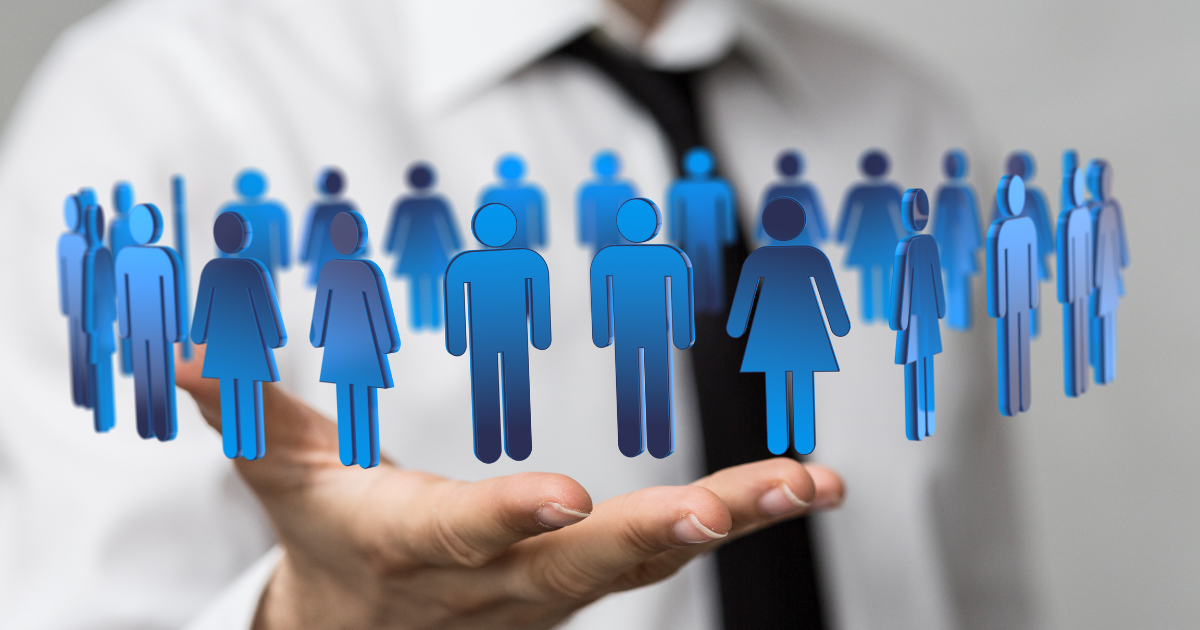**

# Importação das Bibliotecas

In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregado base de dados
base = pd.read_csv('/content/Human_Resources.csv')

In [3]:
# visulizar as 5 primeira linha
base.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# visualização das ultimas linha
base.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# Tamanho da base de dados
base.shape

(1470, 35)

In [6]:
# Informação das base de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Descrição dos dados
base.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Visualização dos Dados

In [8]:
base['Attrition']= base['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [9]:
base['OverTime']= base['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
base['Over18']= base['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [10]:
base.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


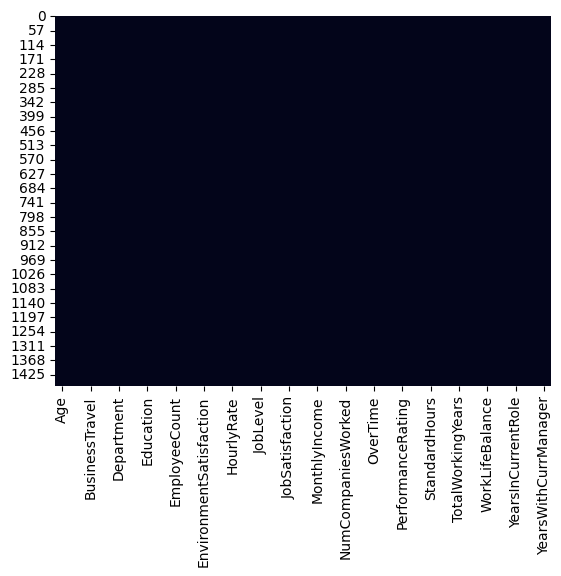

In [11]:
sns.heatmap(base.isnull(), cbar =False);

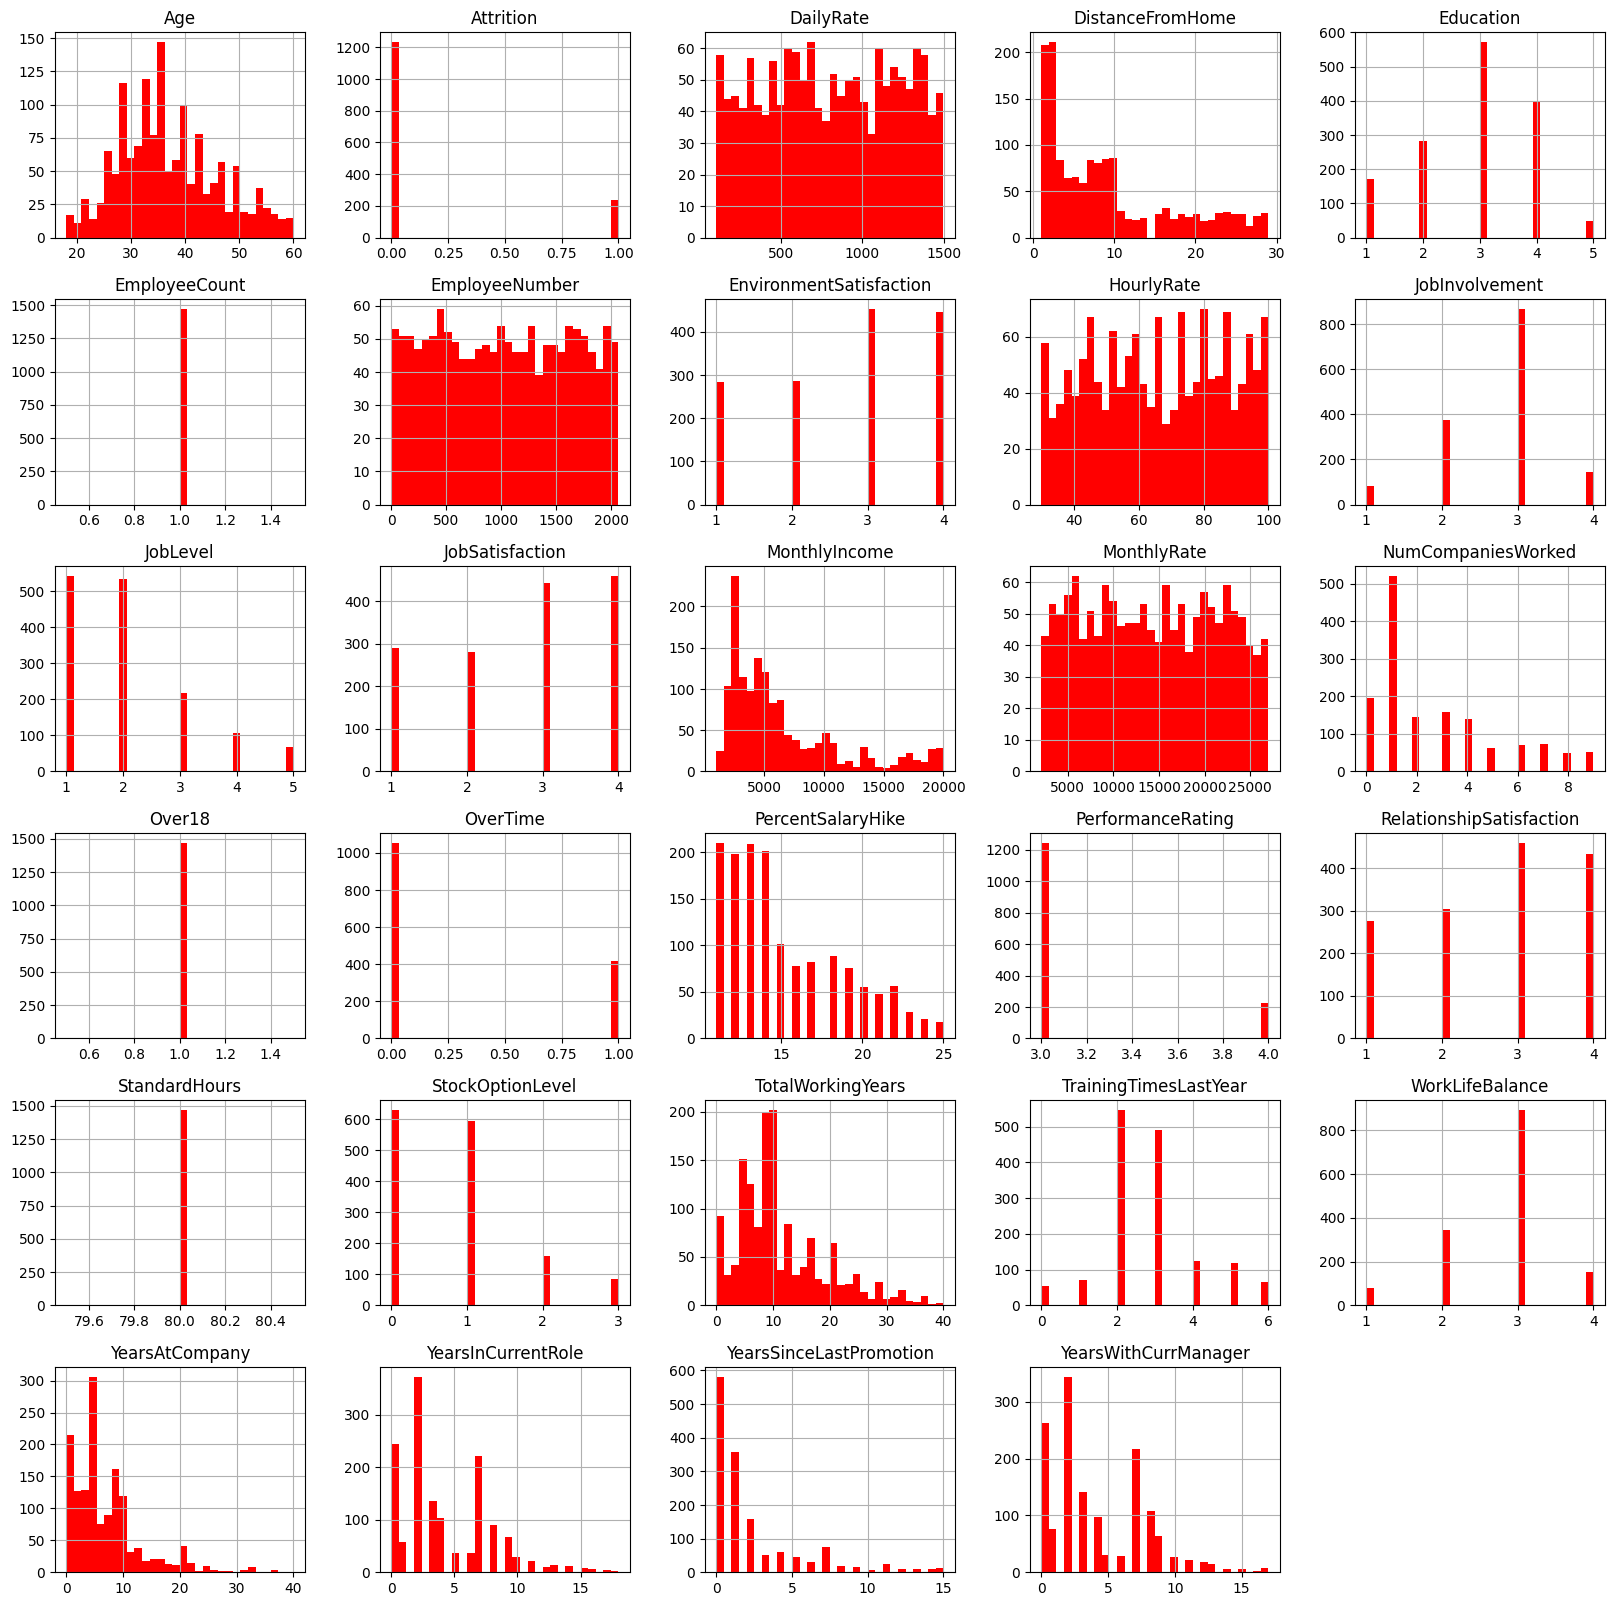

In [12]:
# Graficos de Cada atributo
base.hist(bins=30,figsize=(20,20), color='r');

In [13]:
# Vamos excluir alguns atributos
base.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis = 1, inplace=True)

In [14]:
# Print the first few rows of the DataFrame
print(base.head())

   Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...         

In [15]:
base.head(),base.shape

(   Age  Attrition     BusinessTravel  DailyRate              Department  \
 0   41          1      Travel_Rarely       1102                   Sales   
 1   49          0  Travel_Frequently        279  Research & Development   
 2   37          1      Travel_Rarely       1373  Research & Development   
 3   33          0  Travel_Frequently       1392  Research & Development   
 4   27          0      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
 0                 1          2  Life Sciences                        2   
 1                 8          1  Life Sciences                        3   
 2                 2          2          Other                        4   
 3                 3          4  Life Sciences                        4   
 4                 2          1        Medical                        1   
 
    Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
 0  Fema

In [16]:
# Fazer ums Datafreme
saiu_df = base[base['Attrition'] == 1]
ficou_df = base[base['Attrition'] == 0]

In [17]:
print('Total = ', len(base))
print('Número de funcionários que saíram da empresa = ', len(saiu_df))
print('Porcentagem de funcionários que saíram da empresa = ', (len(saiu_df) / len(base)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(ficou_df))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(ficou_df) / len(base)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [18]:
# Analisando o Describe com as manipulação dos dados
saiu_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [19]:
# Analisando o Describe com as manipulação dos dados
ficou_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
#correlations = base.corr()
#f, ax = plt.subplots(figsize = (20,20))
#sns.heatmap(correlations, annot=True);
#plt.show()

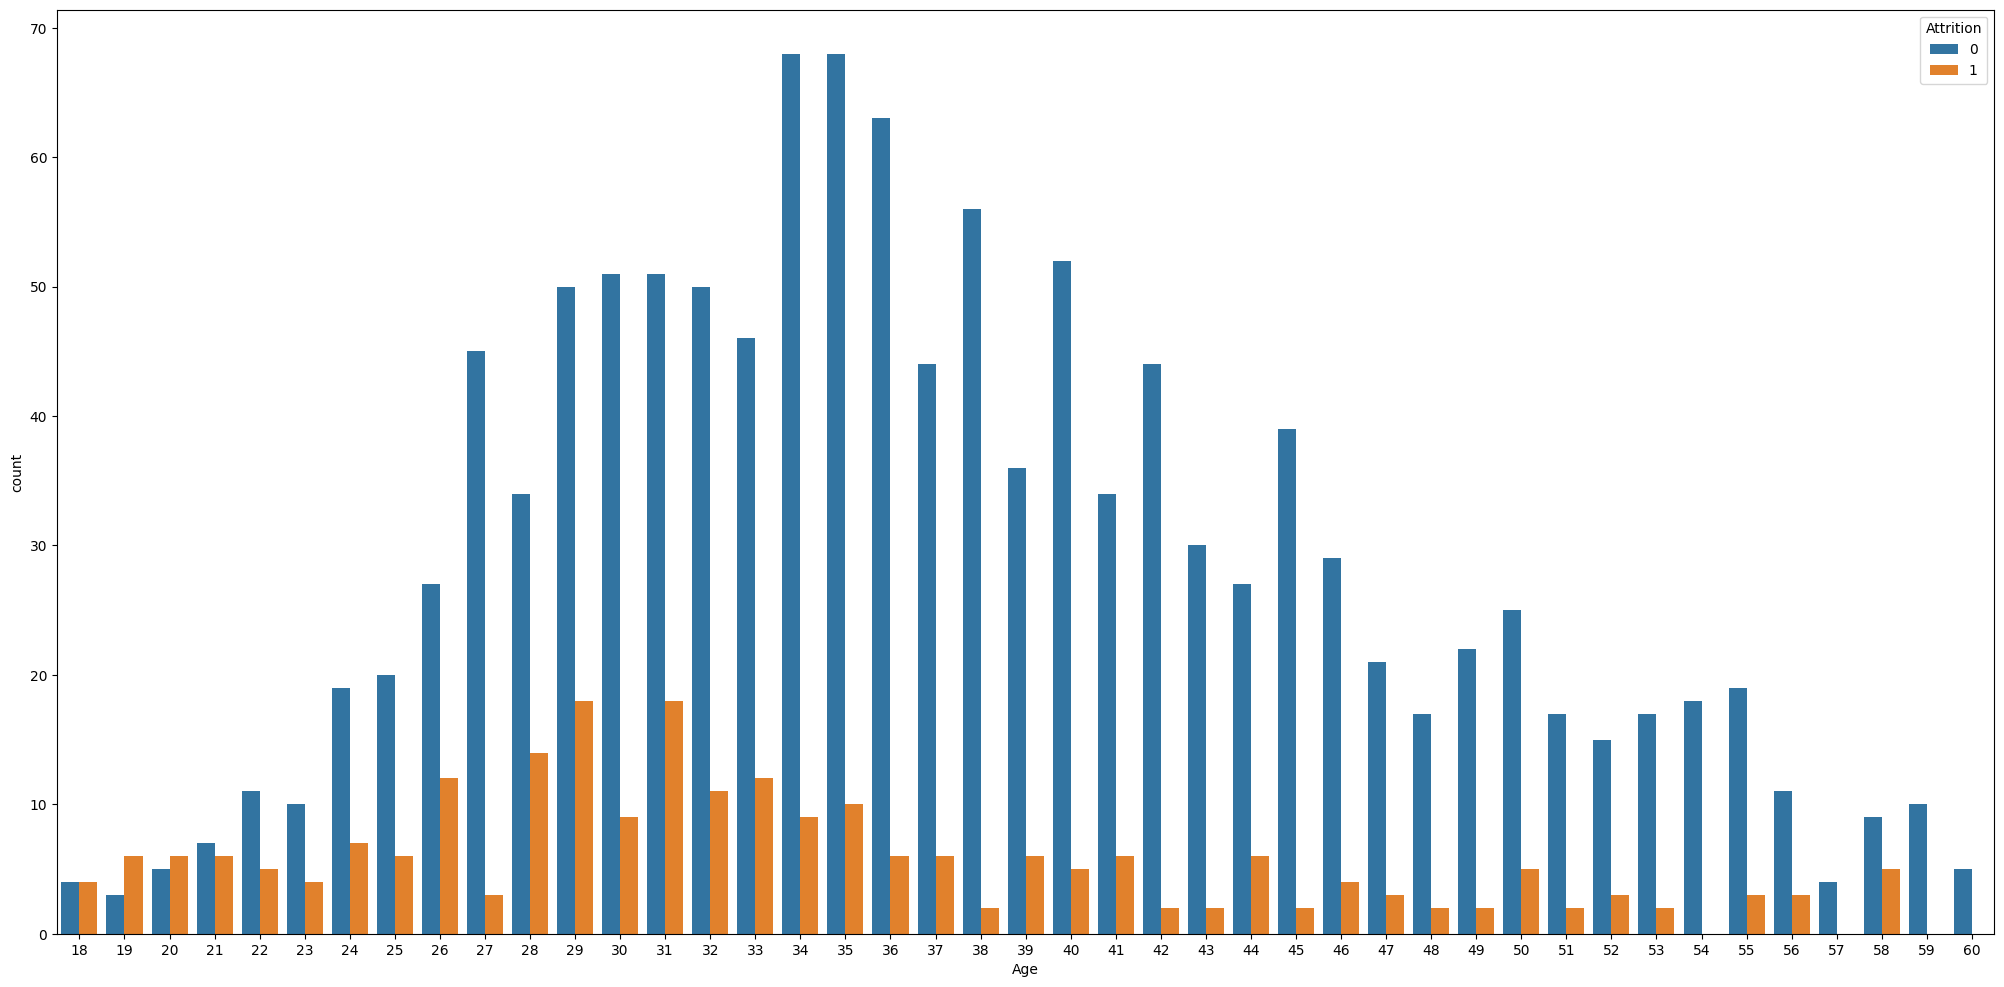

In [20]:
# Grafico countplot
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age',hue = 'Attrition', data=base);

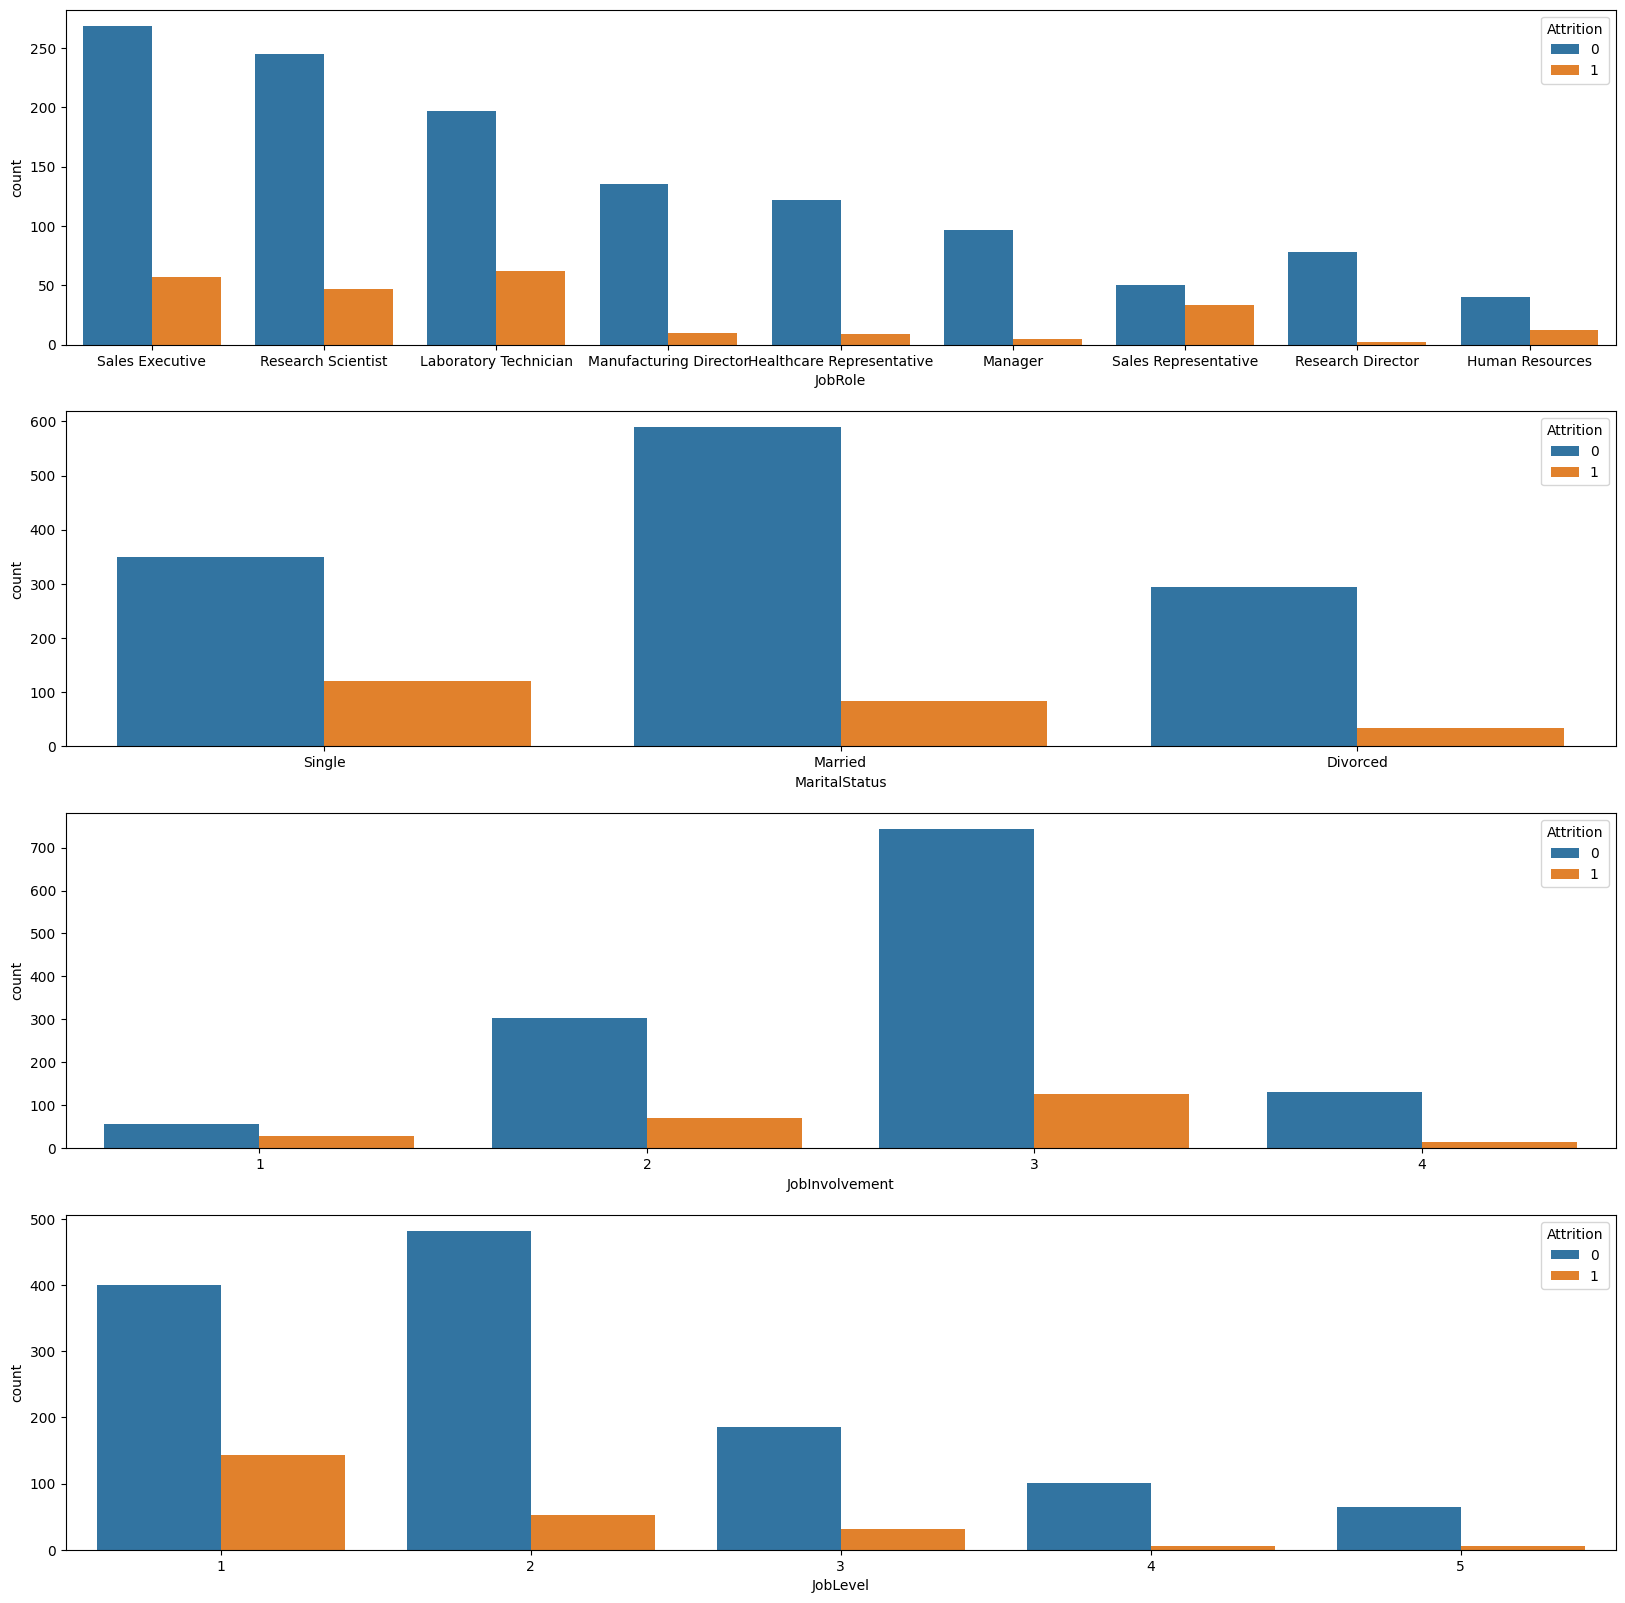

In [21]:
# Graficos para analisar os atributos
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x ='JobRole',hue = 'Attrition', data=base);
plt.subplot(412)
sns.countplot(x ='MaritalStatus',hue = 'Attrition', data=base);
plt.subplot(413)
sns.countplot(x ='JobInvolvement',hue = 'Attrition', data=base);
plt.subplot(414)
sns.countplot(x ='JobLevel',hue = 'Attrition', data=base);


<ipython-input-22-189031588c5d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(saiu_df['DistanceFromHome'], label = 'Funcionarios  que sairam', shade = True, color= 'r');
<ipython-input-22-189031588c5d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ficou_df['DistanceFromHome'], label = 'Funcionarios  que ficaram', shade = True, color= 'b');


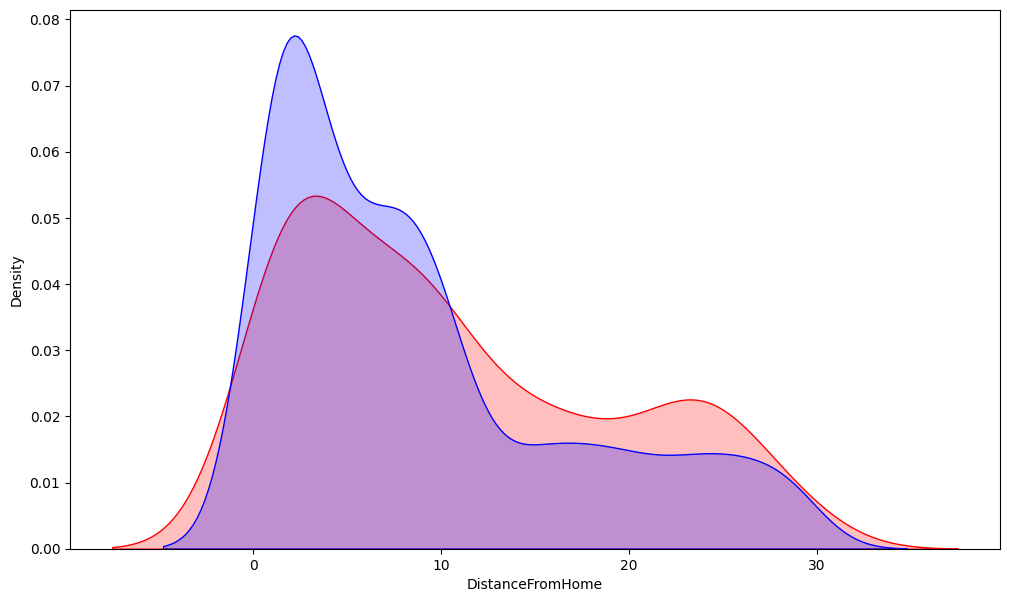

In [22]:
# Grafico  KDE --- Kernel Density - de funcionario que saiu e que ficarão na Empresa
plt.figure(figsize=(12,7))
sns.kdeplot(saiu_df['DistanceFromHome'], label = 'Funcionarios  que sairam', shade = True, color= 'r');
sns.kdeplot(ficou_df['DistanceFromHome'], label = 'Funcionarios  que ficaram', shade = True, color= 'b');

<ipython-input-23-6436676e1c51>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(saiu_df['TotalWorkingYears'], label = 'Funcionarios  que sairam', shade = True, color= 'r');
<ipython-input-23-6436676e1c51>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ficou_df['TotalWorkingYears'], label = 'Funcionarios  que ficaram', shade = True, color= 'b');


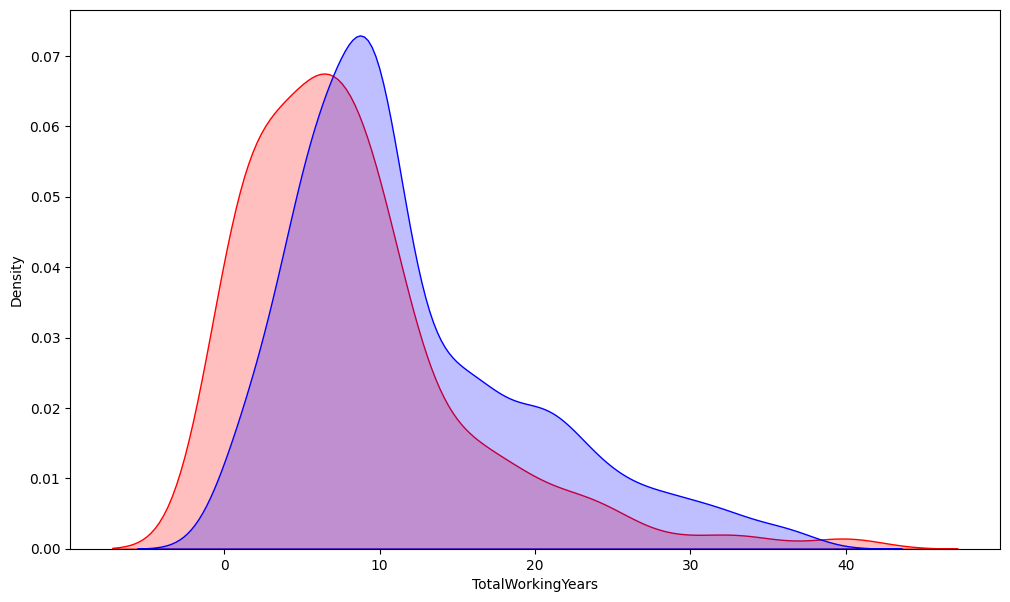

In [23]:
# Grafico  KDE --- Kernel Density - de funcionario que saiu e que ficarão na Empresa
plt.figure(figsize=(12,7));
sns.kdeplot(saiu_df['TotalWorkingYears'], label = 'Funcionarios  que sairam', shade = True, color= 'r');
sns.kdeplot(ficou_df['TotalWorkingYears'], label = 'Funcionarios  que ficaram', shade = True, color= 'b');

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

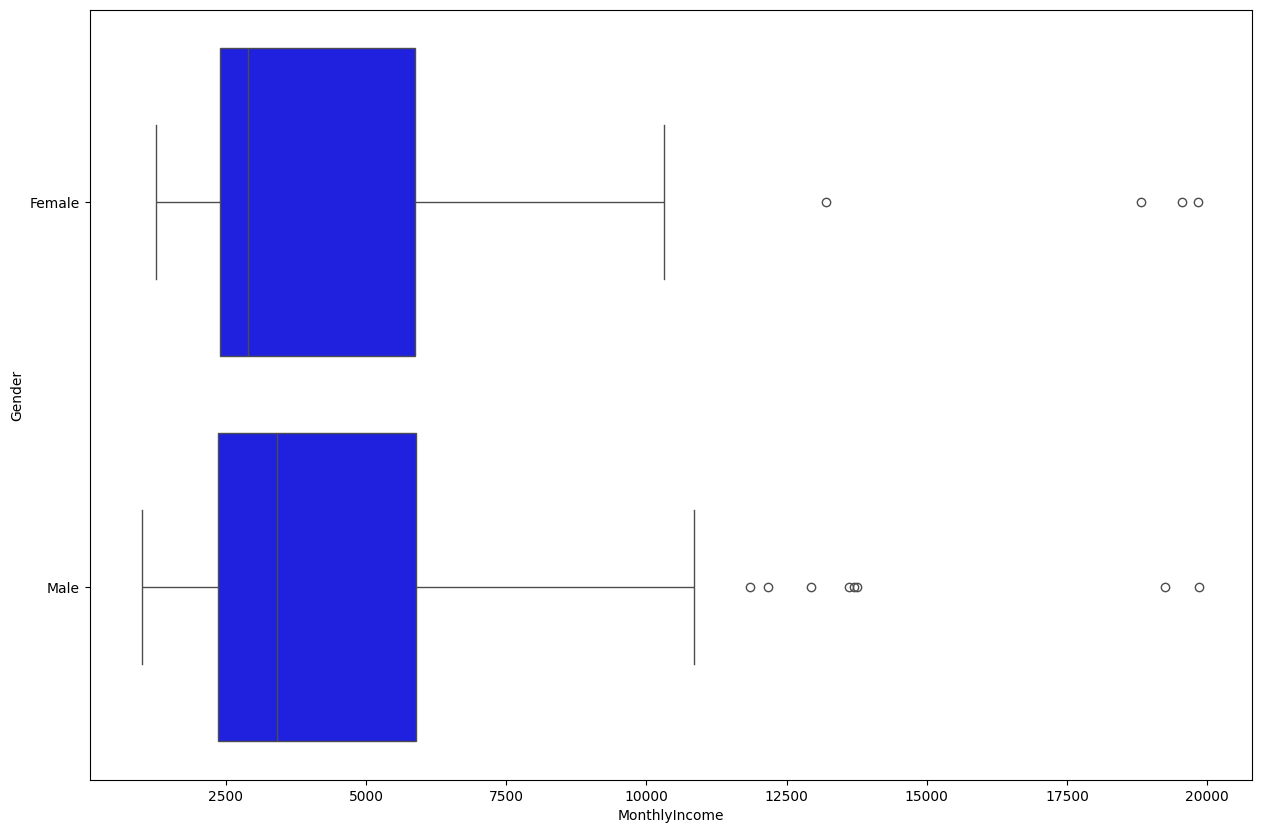

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome',color='b', y='Gender', data=saiu_df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

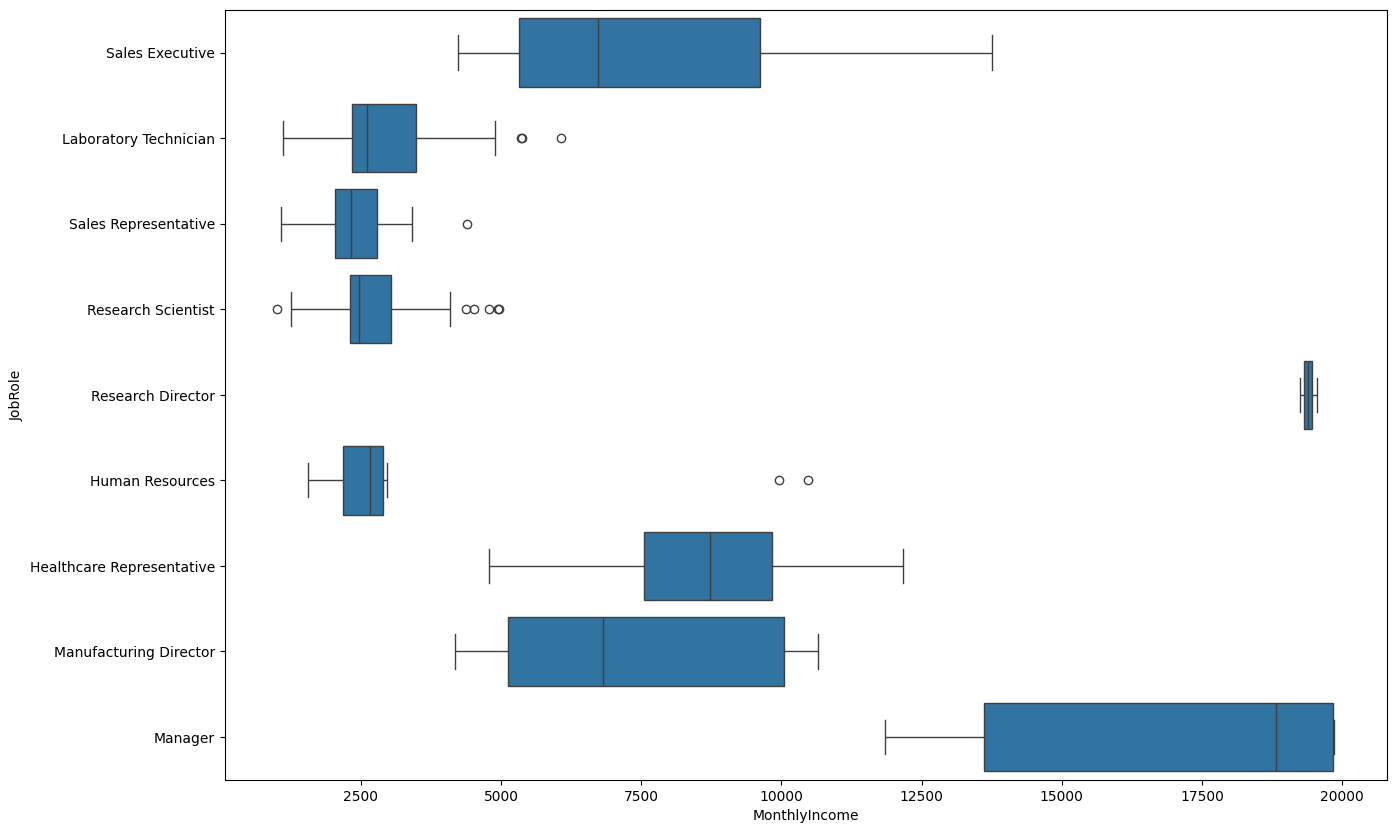

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y ='JobRole', data=saiu_df)

# **Pré-processamento e bases de treinamento/teste**

In [26]:
# Procurando valores categoricos
base.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [27]:
# fazendo uma base de dados com os valores categoricos provisorio
X_cat = base[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]

In [28]:
# visualizando
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [29]:
# Transformando atributos categoricos em numericos
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [30]:
# ler o tamanho da base que fico com as novas alteração
X_cat.shape

(1470, 26)

In [31]:
# Ver o tipo
type(X_cat)

numpy.ndarray

In [32]:
# transforma X_cat em um DataFrame
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [33]:
base['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [34]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
# Vamos Fazer um Armazenamento temporario com valores numericos
x_numerical = base [['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [36]:
# juntando as  variaveis numericas
X_all = pd.concat([X_cat,x_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [37]:
X_all.columns = X_all.columns.astype(str)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [39]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [40]:
y = base['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.25)

In [42]:
# Lendo o tamanho do X_train,y_train
X_train.shape, y_train

((367, 50),
 1267    0
 361     0
 244     0
 686     0
 855     0
        ..
 1027    0
 405     1
 407     0
 684     0
 53      0
 Name: Attrition, Length: 367, dtype: int64)

#  Regressão logistica

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
y_test

658     0
653     0
1272    0
403     0
1105    0
       ..
1462    0
790     0
582     0
1085    1
303     0
Name: Attrition, Length: 1103, dtype: int64

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

0.8495013599274706

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[872,  62],
       [104,  65]])

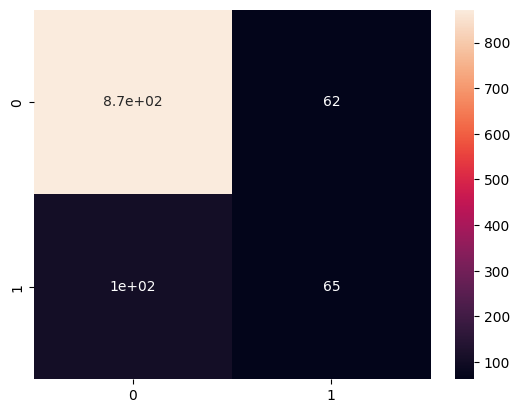

In [51]:
sns.heatmap(cm, annot=True);


In [ ]:
# precision
78 / (78 + 25)

0.7572815533980582

In [ ]:
# recall
78 / (78 + 95)

0.4508670520231214

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report

In [53]:
precision_score(y_test,y_pred)

0.5118110236220472

In [54]:
recall_score(y_test,y_pred)

0.38461538461538464

In [55]:
f1_score(y_test, y_pred, average='macro')

0.6761390972123957

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       934
           1       0.51      0.38      0.44       169

    accuracy                           0.85      1103
   macro avg       0.70      0.66      0.68      1103
weighted avg       0.83      0.85      0.84      1103



# **Random Forest**

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred = forest.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
accuracy_score(y_test, y_pred)

0.8594741613780599

In [62]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[927, 148],
       [  7,  21]])

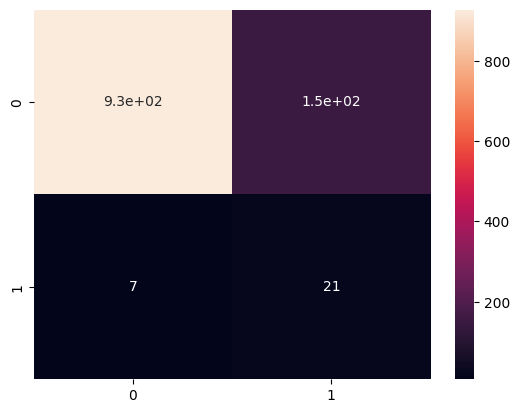

In [63]:
sns.heatmap(cm, annot=True);

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       934
           1       0.75      0.12      0.21       169

    accuracy                           0.86      1103
   macro avg       0.81      0.56      0.57      1103
weighted avg       0.85      0.86      0.81      1103



# Redes Neurais Artificiais

In [65]:
import tensorflow as tf


In [66]:
X_train.shape

(367, 50)

In [67]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2601 (10.16 KB)
Trainable params: 2601 (10.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
rede_neural.compile(optimizer="Adam", loss="binary_crossentropy", metrics = ['accuracy'])

In [69]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
12/12 [==============================] - 1s 2ms/step - loss: 0.5855 - accuracy: 0.7956
Epoch 2/200
12/12 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.8147
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8147
Epoch 4/200
12/12 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8147
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8147
Epoch 6/200
12/12 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.8147
Epoch 7/200
12/12 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8147
Epoch 8/200
12/12 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8147
Epoch 9/200
12/12 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8147
Epoch 10/200
12/12 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8147
Epoch 11/

In [70]:
y_pred = rede_neural.predict(X_test)
y_pred

35/35 [==============================] - 0s 1ms/step


array([[4.7210098e-04],
       [1.6291621e-11],
       [7.7773697e-11],
       ...,
       [4.8716478e-13],
       [5.2420606e-09],
       [4.1150283e-03]], dtype=float32)

In [71]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [72]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[806, 128],
       [103,  66]])

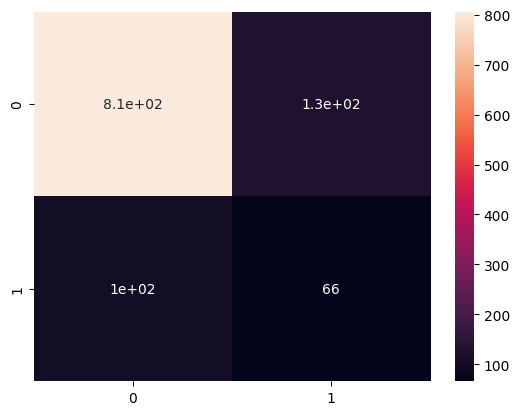

In [73]:
sns.heatmap(cm, annot=True);

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       934
           1       0.34      0.39      0.36       169

    accuracy                           0.79      1103
   macro avg       0.61      0.63      0.62      1103
weighted avg       0.80      0.79      0.80      1103



# Salvar o Classificador

In [75]:
import pickle

In [76]:
with open('Variaveis_movelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logistic],f)

In [77]:
with open('Variaveis_movelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [78]:
min_max,encoder,model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [79]:
X_novo = base.iloc[0:1]
X_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [80]:
X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [81]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [82]:
X_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [83]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [84]:
X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5


In [85]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [92]:
X_all_novo.columns = X_all_novo.columns.astype(str)

In [93]:
X_novo = min_max.transform(X_all_novo)
X_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [94]:
model.predict(X_novo)

array([1])

In [95]:
model.predict_proba(X_novo)

array([[0.31129492, 0.68870508]])

In [96]:
model.classes_

array([0, 1])